
🔹 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

🔹 First 5 Rows:

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

🔹 Missing Values:

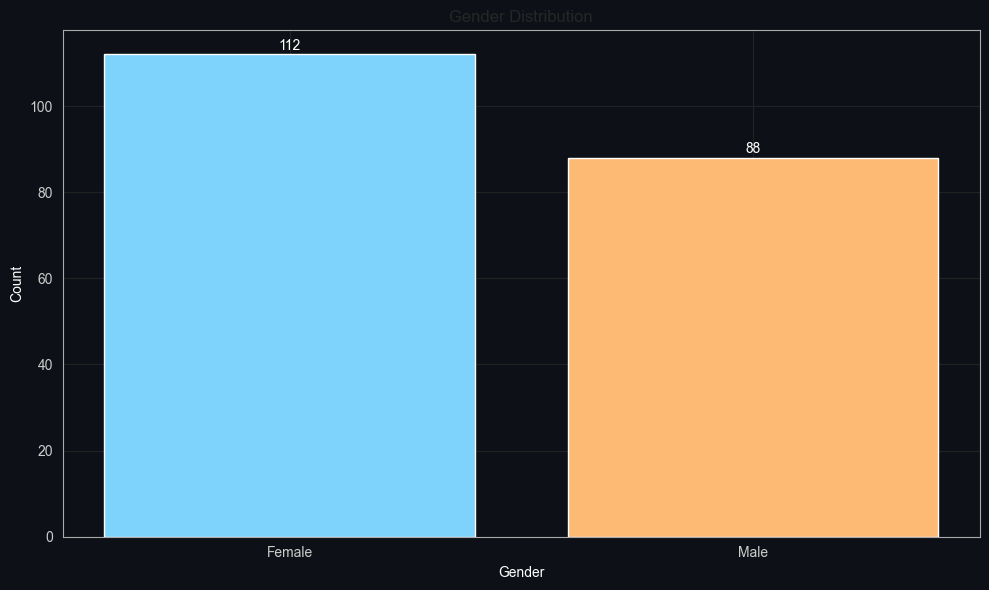

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\02_age_distribution.png


<Figure size 1000x600 with 0 Axes>

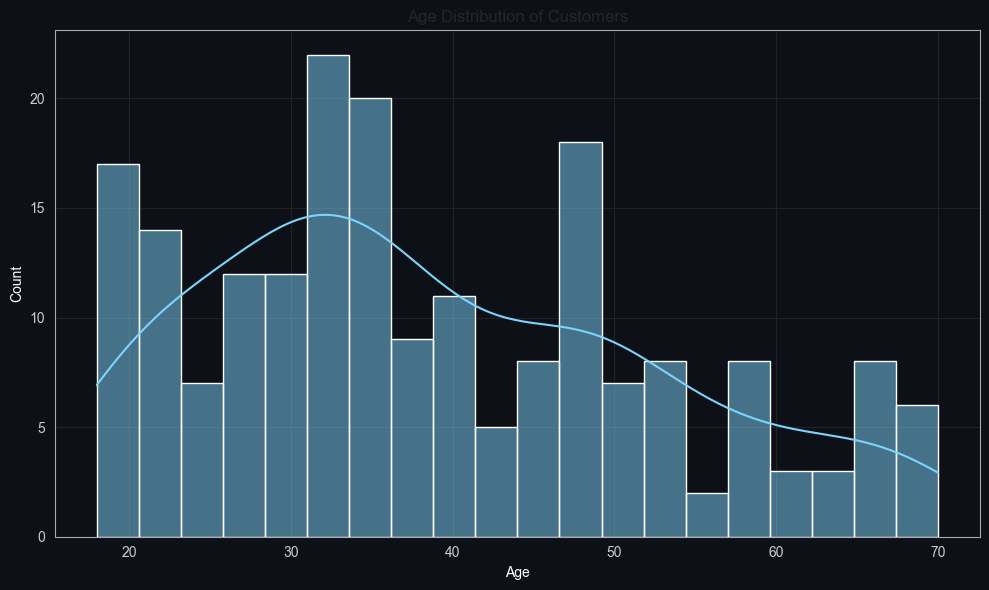

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\03_income_distribution.png


<Figure size 1000x600 with 0 Axes>

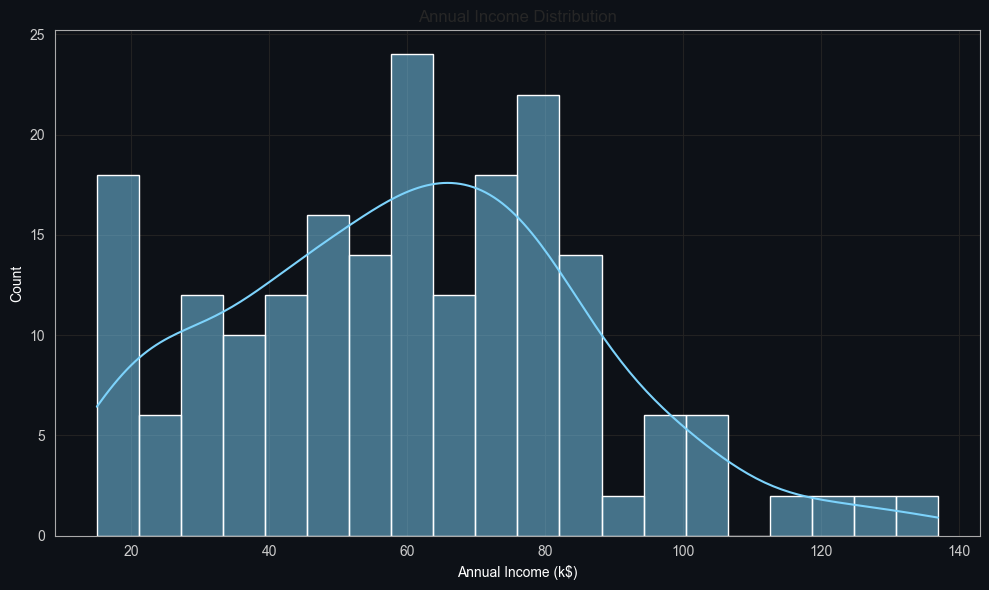

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\04_spending_score_distribution.png


<Figure size 1000x600 with 0 Axes>

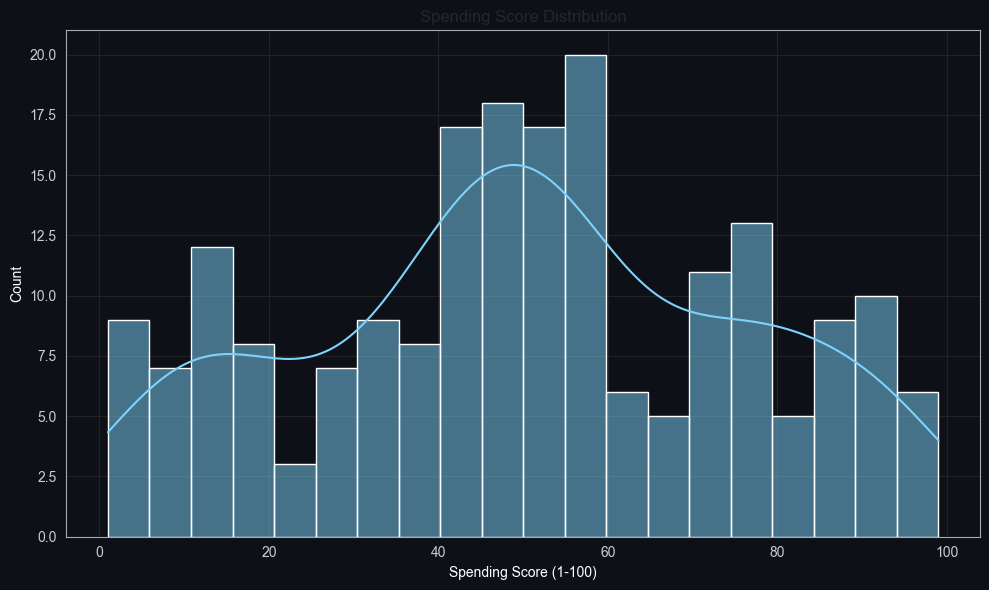

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\05_age_vs_spending_by_gender.png


<Figure size 1000x600 with 0 Axes>

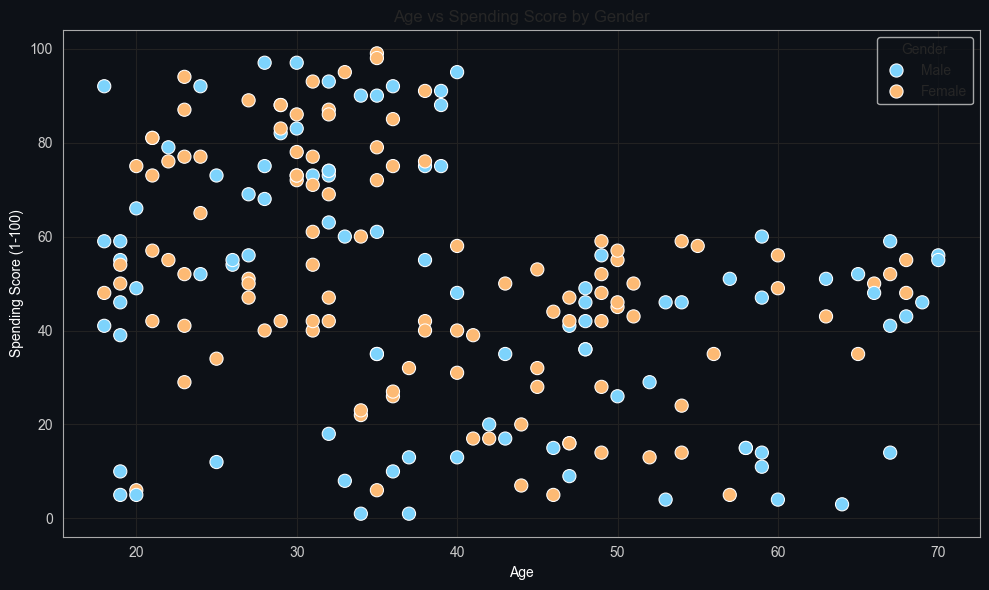

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\06_income_vs_spending.png


<Figure size 1000x600 with 0 Axes>

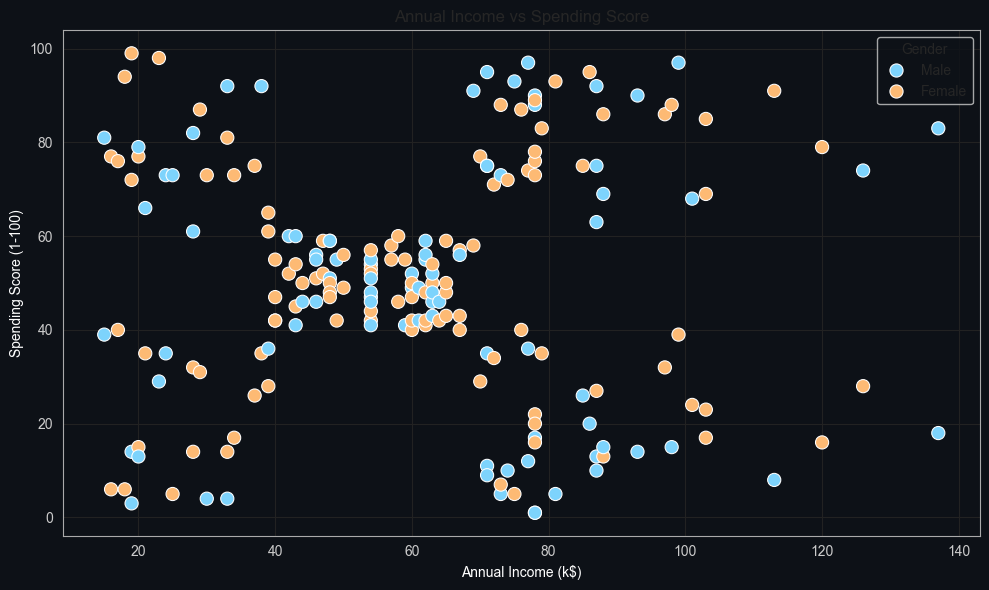

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\07_pairplot_by_gender.png


<Figure size 1000x600 with 0 Axes>

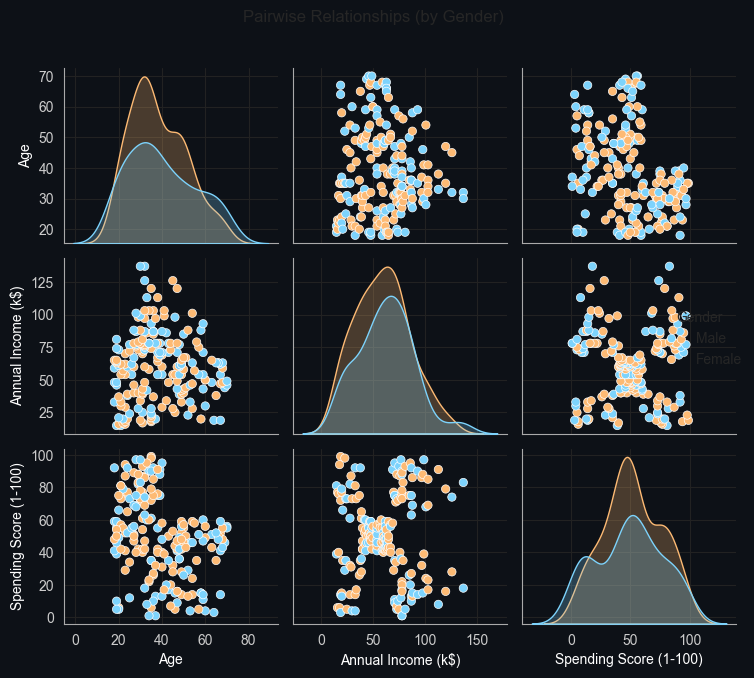

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\08_correlation_heatmap.png


<Figure size 1000x600 with 0 Axes>

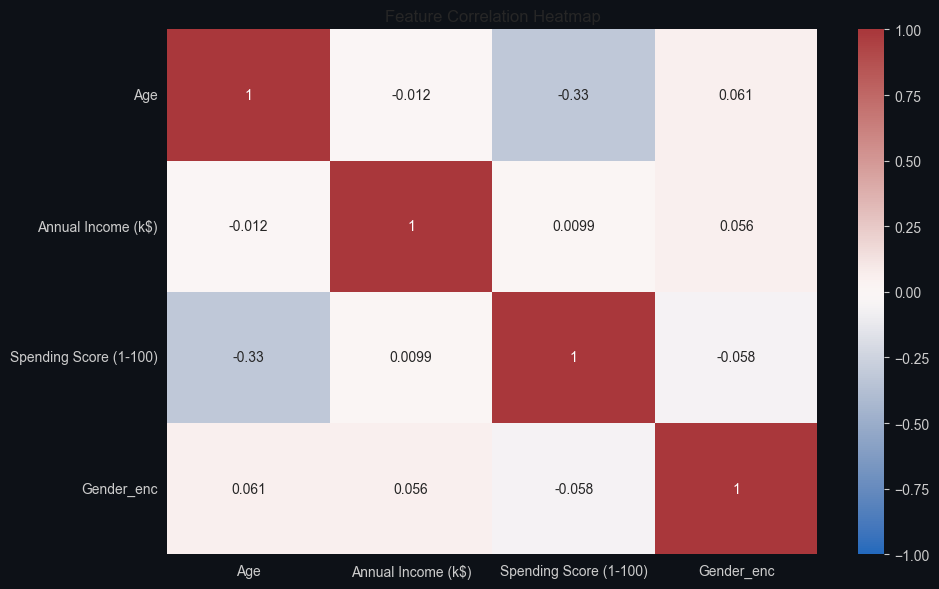

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\09_boxplot_age_by_gender.png


<Figure size 1000x600 with 0 Axes>

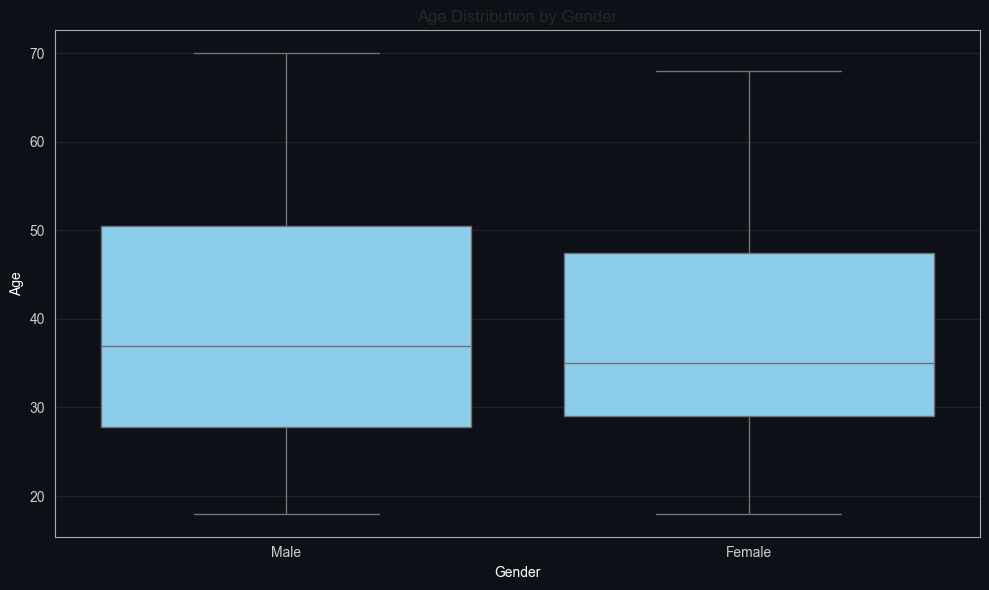

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\10_boxplot_income_by_gender.png


<Figure size 1000x600 with 0 Axes>

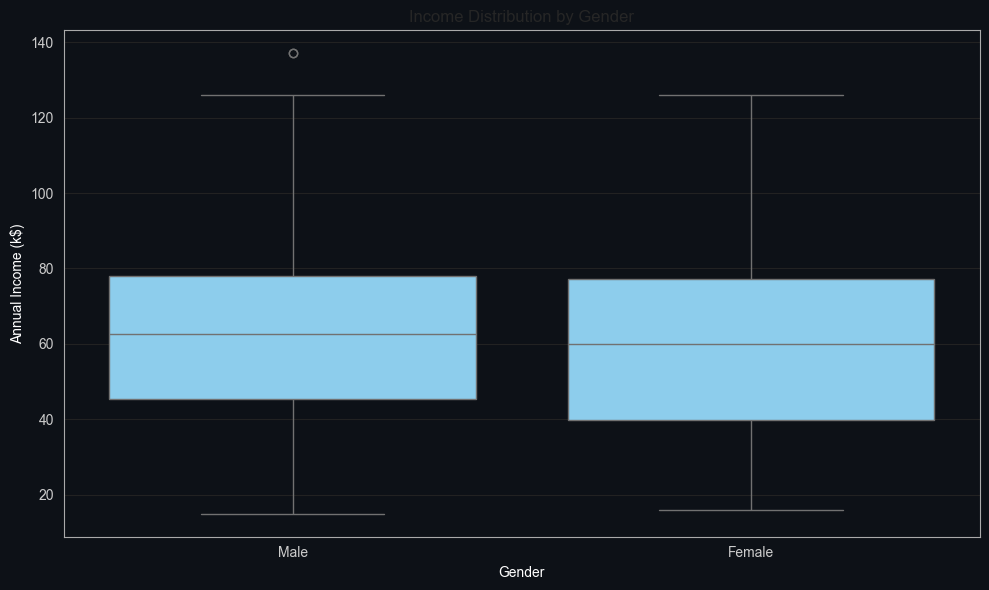

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\11_kde_spending_by_gender.png


<Figure size 1000x600 with 0 Axes>

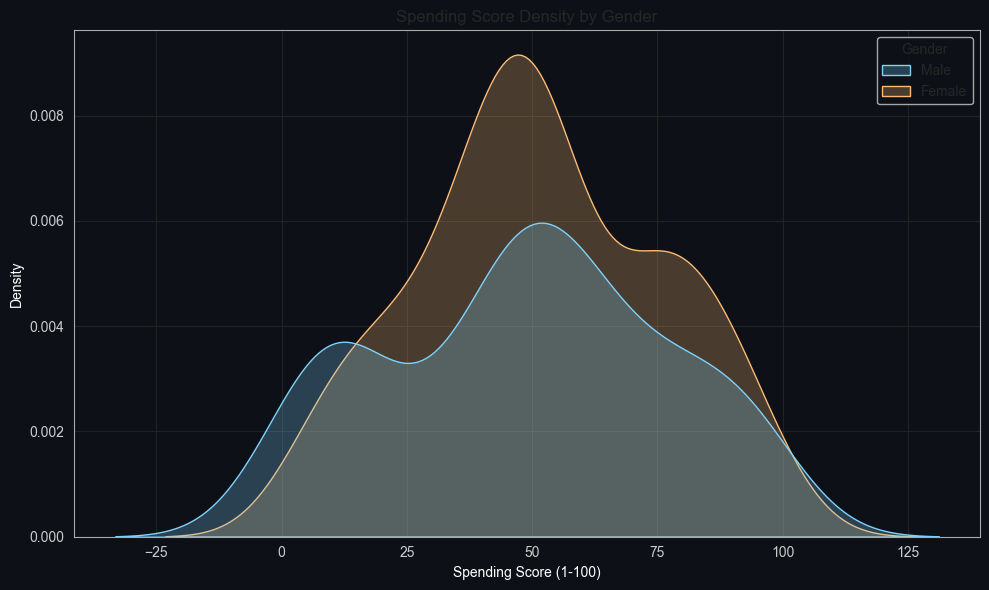

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\12_age_vs_income.png


<Figure size 1000x600 with 0 Axes>

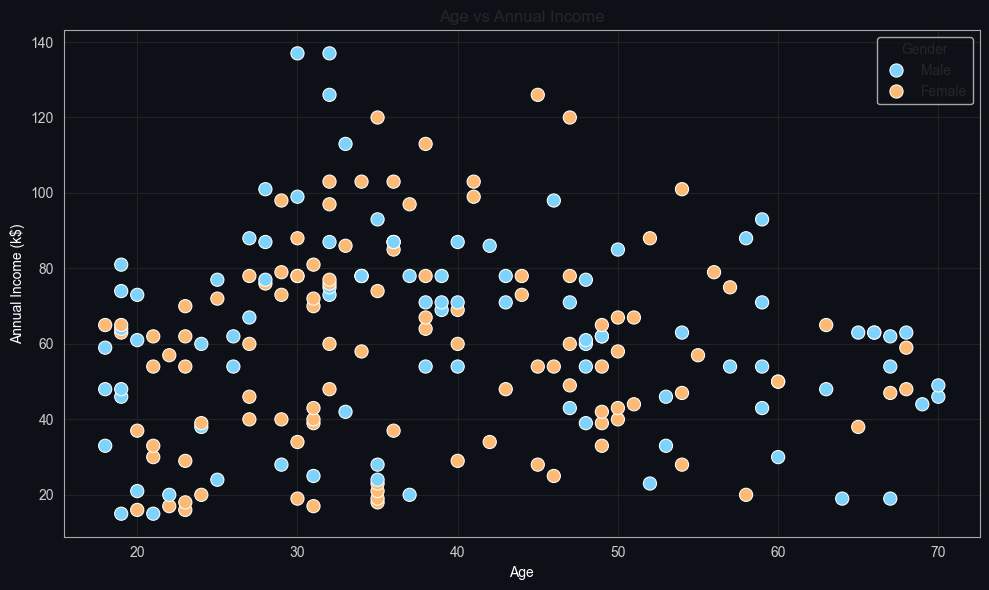

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\13_violin_spending_by_gender.png


<Figure size 1000x600 with 0 Axes>

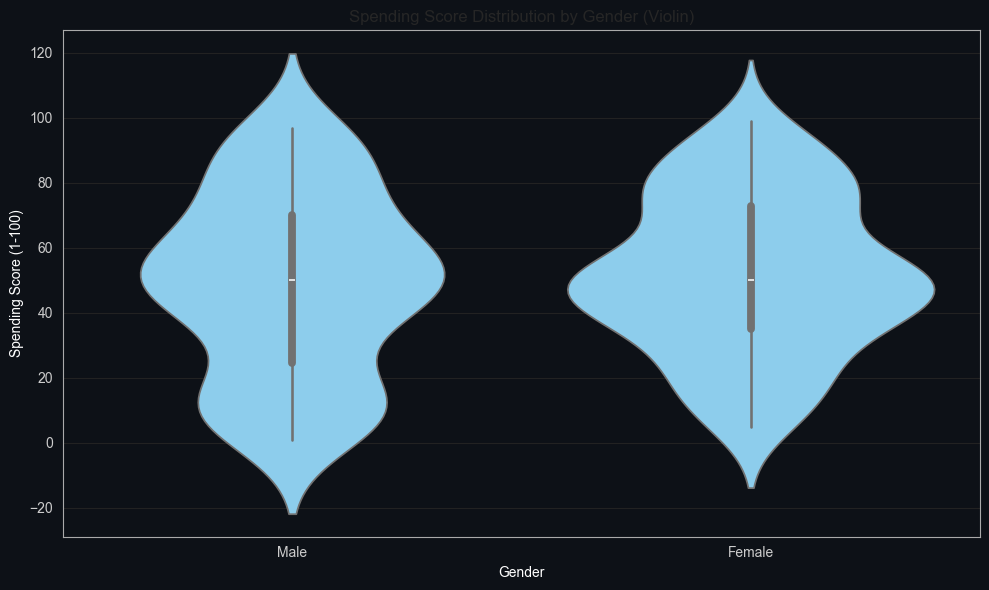

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\14_pairplot_numeric.png


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

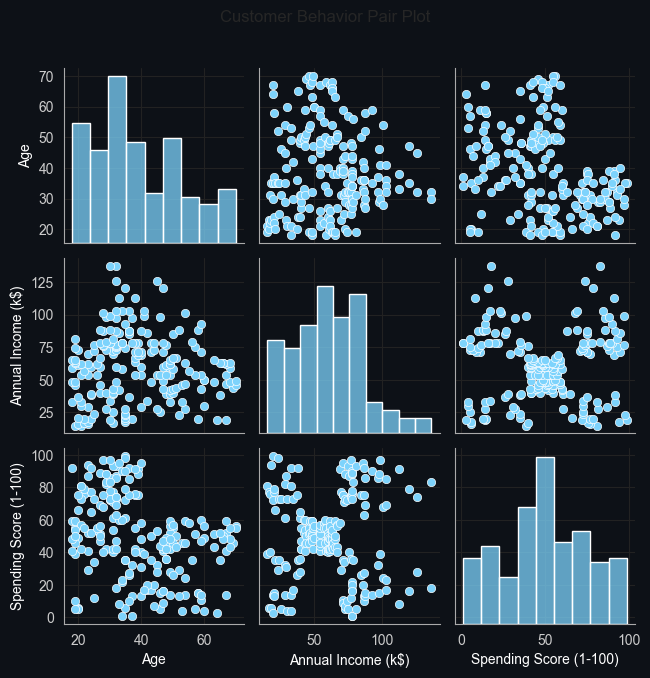

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\15_3d_before_clustering.png


<Figure size 1000x600 with 0 Axes>

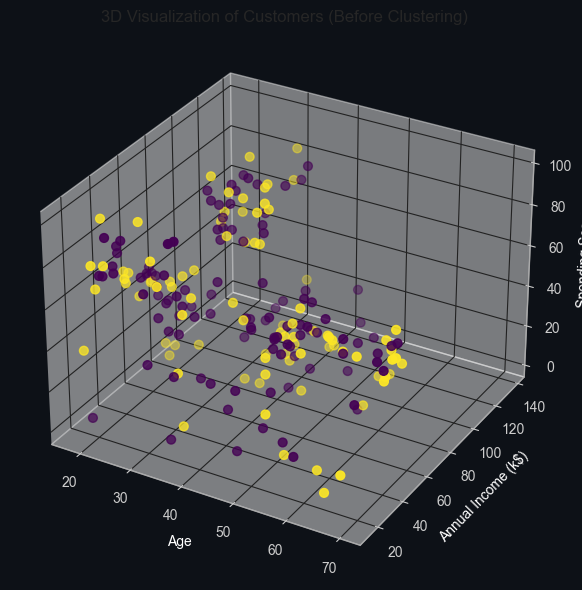

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\16_elbow_method.png


<Figure size 1000x600 with 0 Axes>

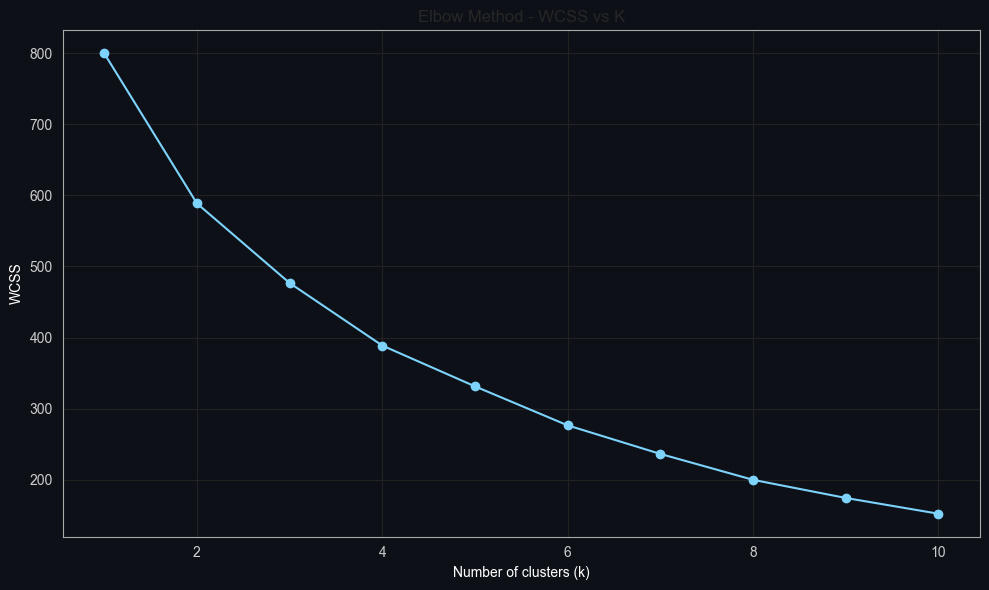


🔹 Silhouette Scores:
 k = 2  ->  silhouette score = 0.2518
 k = 3  ->  silhouette score = 0.2595
 k = 4  ->  silhouette score = 0.2984
 k = 5  ->  silhouette score = 0.3041
 k = 6  ->  silhouette score = 0.3311
 k = 7  ->  silhouette score = 0.3574
 k = 8  ->  silhouette score = 0.3880
Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\17_clusters_income_vs_spending_k5.png


<Figure size 1000x600 with 0 Axes>

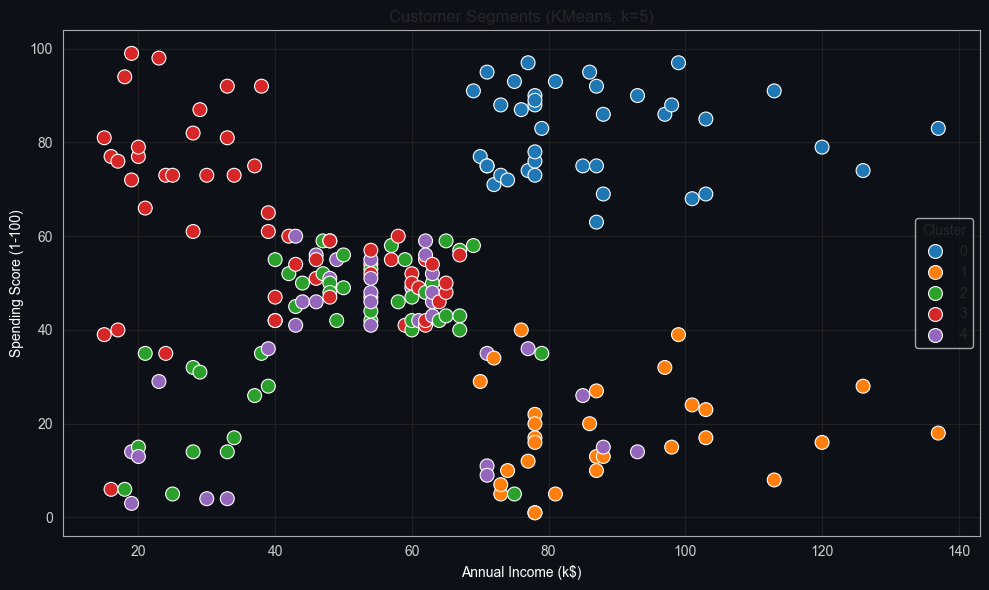

Saved: C:\Users\Abdullah Umer\Desktop\Arch Technologies Internship\Task 3\outputs\18_pca_3d_clusters_k5.png


<Figure size 1000x600 with 0 Axes>

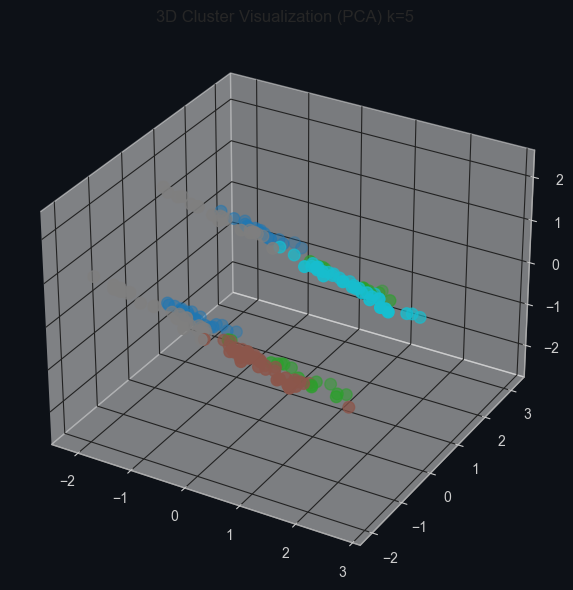


🔹 Cluster Centers (approx. in original units):
                Age  Annual Income (k$)  Spending Score (1-100)    Gender_enc
Cluster                                                                     
0        32.692308           86.538462               82.128205  4.615385e-01
1        36.482759           89.517241               18.000000  4.482759e-01
2        49.813953           49.232558               40.069767 -5.551115e-17
3        24.907407           39.722222               61.203704  4.074074e-01
4        55.714286           53.685714               36.771429  1.000000e+00

🔹 Cluster Summary (Mean values):
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        32.692308           86.538462               82.128205
1        36.482759           89.517241               18.000000
2        49.813953           49.232558               40.069767
3        24.907407           39.722222               61.203704

<Figure size 1000x600 with 0 Axes>

In [1]:
# ----------------------------------------------------------

# 🎯 TASK 3: Customer Segmentation

# ----------------------------------------------------------

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D   # needed for 3D scatter in some envs

# ---------------------------
# Configuration / Paths
# ---------------------------
CSV_FILENAME = "C:/Users/Abdullah Umer/Desktop/Arch Technologies Internship/Task 3/Mall_Customers.csv"  
base_dir = os.path.dirname(os.path.abspath(CSV_FILENAME)) if os.path.exists(CSV_FILENAME) else os.getcwd()
csv_path = os.path.join(base_dir, CSV_FILENAME)
output_dir = os.path.join(base_dir, "outputs")
os.makedirs(output_dir, exist_ok=True)

# ---------------------------
# Dark style
# ---------------------------
plt.style.use('dark_background')
sns.set_style("darkgrid")

# Define a friendly color palette (used by seaborn when no palette arg is passed)
friendly_colors = ["#7DD3FC", "#FDBA74", "#A78BFA", "#86EFAC", "#FCA5A5", "#FCD34D"]
sns.set_palette(sns.color_palette(friendly_colors))

# Global rcParams for dark background niceness
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.facecolor'] = '#0D1117'
plt.rcParams['figure.facecolor'] = '#0D1117'
plt.rcParams['axes.edgecolor'] = '#AAAAAA'
plt.rcParams['axes.labelcolor'] = '#FFFFFF'
plt.rcParams['xtick.color'] = '#CCCCCC'
plt.rcParams['ytick.color'] = '#CCCCCC'
plt.rcParams['grid.color'] = '#222222'

# Helper to save and show figures consistently
def save_and_show(fname: str, dpi=220):
    path = os.path.join(output_dir, fname)
    plt.tight_layout()
    plt.savefig(path, dpi=dpi, bbox_inches='tight', facecolor=plt.gcf().get_facecolor())
    print(f"Saved: {path}")
    plt.show()
    plt.clf()  # clear figure to avoid overlapping plots

# ---------------------------
# Load dataset
# ---------------------------
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV file not found at: {csv_path}. Put Mall_Customers.csv in the script folder.")
data = pd.read_csv(csv_path)

# Basic info
print("\n🔹 Data Info:\n")
print(data.info())
print("\n🔹 First 5 Rows:\n")
print(data.head())

# Missing values
print("\n🔹 Missing Values:\n", data.isnull().sum())

# ---------------------------
# Preprocessing
# ---------------------------
# Encode Gender (Male/Female -> 1/0)
le = LabelEncoder()
if 'Gender' in data.columns:
    data['Gender_enc'] = le.fit_transform(data['Gender'])  # keep original Gender column too
else:
    raise KeyError("Expected column 'Gender' not found in dataset.")

# Choose features for clustering
feature_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # core behavior features
# Optionally include encoded gender if you want:
feature_cols_with_gender = feature_cols + ['Gender_enc']

# Use the set that includes gender for this script
features = data[feature_cols_with_gender].copy()

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# ---------------------------
# 15 Visualizations 
# ---------------------------

# 1) Gender distribution (bar plot using matplotlib to avoid seaborn palette/hue warnings)
gender_counts = data['Gender'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(gender_counts.index.astype(str), gender_counts.values, color=friendly_colors[:len(gender_counts)])
ax.set_title("Gender Distribution")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
for i, v in enumerate(gender_counts.values):
    ax.text(i, v + 1, str(v), ha='center', color='white')
save_and_show("01_gender_distribution.png")

# 2) Age distribution (hist)
plt.figure()
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
save_and_show("02_age_distribution.png")

# 3) Annual Income distribution
plt.figure()
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
save_and_show("03_income_distribution.png")

# 4) Spending Score distribution
plt.figure()
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
save_and_show("04_spending_score_distribution.png")

# 5) Age vs Spending Score colored by Gender (scatter)
plt.figure()
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data, hue='Gender', s=90)
plt.title("Age vs Spending Score by Gender")
save_and_show("05_age_vs_spending_by_gender.png")

# 6) Income vs Spending Score (scatter)
plt.figure()
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Gender', s=90)
plt.title("Annual Income vs Spending Score")
save_and_show("06_income_vs_spending.png")

# 7) Pairplot with hue=Gender (smaller size to save memory)
pairplot_df = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].copy()
sns.pairplot(pairplot_df, hue='Gender', height=2.2, corner=False)
plt.suptitle("Pairwise Relationships (by Gender)", y=1.02)
save_and_show("07_pairplot_by_gender.png", dpi=160)

# 8) Correlation heatmap
plt.figure()
corr = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_enc']].corr()
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
save_and_show("08_correlation_heatmap.png")

# 9) Boxplot - Age by Gender (use seaborn but without passing palette parameter)
plt.figure()
sns.boxplot(x='Gender', y='Age', data=data)
plt.title("Age Distribution by Gender")
save_and_show("09_boxplot_age_by_gender.png")

# 10) Boxplot - Income by Gender
plt.figure()
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title("Income Distribution by Gender")
save_and_show("10_boxplot_income_by_gender.png")

# 11) KDE Plot - Spending Score by Gender
plt.figure()
sns.kdeplot(data=data, x='Spending Score (1-100)', hue='Gender', fill=True)
plt.title("Spending Score Density by Gender")
save_and_show("11_kde_spending_by_gender.png")

# 12) Scatter - Age vs Income
plt.figure()
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue='Gender', s=90)
plt.title("Age vs Annual Income")
save_and_show("12_age_vs_income.png")

# 13) Violin Plot - Spending Score by Gender
plt.figure()
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title("Spending Score Distribution by Gender (Violin)")
save_and_show("13_violin_spending_by_gender.png")

# 14) Pairwise plot of numeric features (no hue)
plt.figure()
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], height=2.2, corner=False)
plt.suptitle("Customer Behavior Pair Plot", y=1.02)
save_and_show("14_pairplot_numeric.png", dpi=160)

# 15) 3D scatter BEFORE clustering
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'],
                     c=data['Gender_enc'], cmap='viridis', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
plt.title("3D Visualization of Customers (Before Clustering)")
# Save 3D figure
path3d = os.path.join(output_dir, "15_3d_before_clustering.png")
plt.tight_layout()
plt.savefig(path3d, dpi=220, bbox_inches='tight', facecolor=plt.gcf().get_facecolor())
print(f"Saved: {path3d}")
plt.show()
plt.clf()

# ---------------------------
# Clustering: Elbow + Silhouette
# ---------------------------

# Elbow method (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - WCSS vs K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
save_and_show("16_elbow_method.png")

# Silhouette scores to help select k
print("\n🔹 Silhouette Scores:")
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f" k = {k}  ->  silhouette score = {score:.4f}")

# According to the elbow/silhouette you can pick an appropriate k.
# We'll choose k=5 as example (change if you prefer)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# ---------------------------
# Visualize final clusters (2D + PCA 3D) and save
# ---------------------------

# 2D: Income vs Spending colored by cluster
plt.figure()
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=data, hue='Cluster', palette='tab10', s=100)
plt.title(f"Customer Segments (KMeans, k={k_opt})")
save_and_show(f"17_clusters_income_vs_spending_k{k_opt}.png")

# PCA -> 3D cluster visualization (for multi-dim overview)
pca = PCA(n_components=3, random_state=42)
pca_components = pca.fit_transform(scaled_data)

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2],
               c=data['Cluster'], cmap='tab10', s=70)
ax.set_title(f"3D Cluster Visualization (PCA) k={k_opt}")
path_pca = os.path.join(output_dir, f"18_pca_3d_clusters_k{k_opt}.png")
plt.tight_layout()
plt.savefig(path_pca, dpi=220, bbox_inches='tight', facecolor=plt.gcf().get_facecolor())
print(f"Saved: {path_pca}")
plt.show()
plt.clf()

# Cluster centers (in original feature space) -> inverse transform from scaled
centers_scaled = kmeans.cluster_centers_
centers_orig = scaler.inverse_transform(centers_scaled)
cluster_center_df = pd.DataFrame(centers_orig, columns=feature_cols_with_gender)
cluster_center_df.index.name = 'Cluster'
print("\n🔹 Cluster Centers (approx. in original units):\n", cluster_center_df)

# Cluster summary (mean values per cluster)
cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\n🔹 Cluster Summary (Mean values):\n", cluster_summary)

# Save cluster summary to CSV
summary_path = os.path.join(output_dir, f"cluster_summary_k{k_opt}.csv")
cluster_summary.to_csv(summary_path)
print(f"Saved cluster summary: {summary_path}")



# ---------------------------
# Insights (example template — update after looking at cluster_summary)
# ---------------------------
print("\n💡 Example Insights (update after reviewing cluster_summary):")
for idx, row in cluster_summary.iterrows():
    age = row['Age']
    inc = row['Annual Income (k$)']
    spend = row['Spending Score (1-100)']
    print(f" Cluster {idx}: mean age={age:.1f}, mean income={inc:.1f}k$, mean spending={spend:.1f}")

print("\n✅ Script finished. All plots saved to folder:", output_dir)




